In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1337, 7)

In [12]:
print("Unique values in each column:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Unique values in each column:
age: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex: ['female' 'male']
bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.9

# **EDA**

In [13]:
# Pie chart: Gender-wise distribution
fig1 = px.pie(df, names='sex', title='Gender-wise Distribution')
fig1.show()

In [14]:
# Pie chart: Smoker distribution
fig2 = px.pie(df, names='smoker', title='Smoker Distribution')
fig2.show()

In [15]:
# Histogram: Number of children
fig3 = px.histogram(df, x='children', title='Distribution of Number of Children')
fig3.show()

In [16]:
# Violin plot: Sex vs. BMI
fig4 = px.violin(df, x='sex', y='bmi', box=True, points='all', title='Sex vs. BMI')
fig4.show()

In [17]:
# Count plot: Region distribution
fig5 = px.histogram(df, x='region', title='Region-wise Distribution', category_orders=dict(region=df['region'].unique()))
fig5.show()

In [18]:
# Unique plot: Charges vs. BMI scatter plot with trendline
fig6 = px.scatter(df, x='bmi', y='charges', trendline='ols', title='Charges vs. BMI')
fig6.show()

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Label Encoding for categorical columns
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


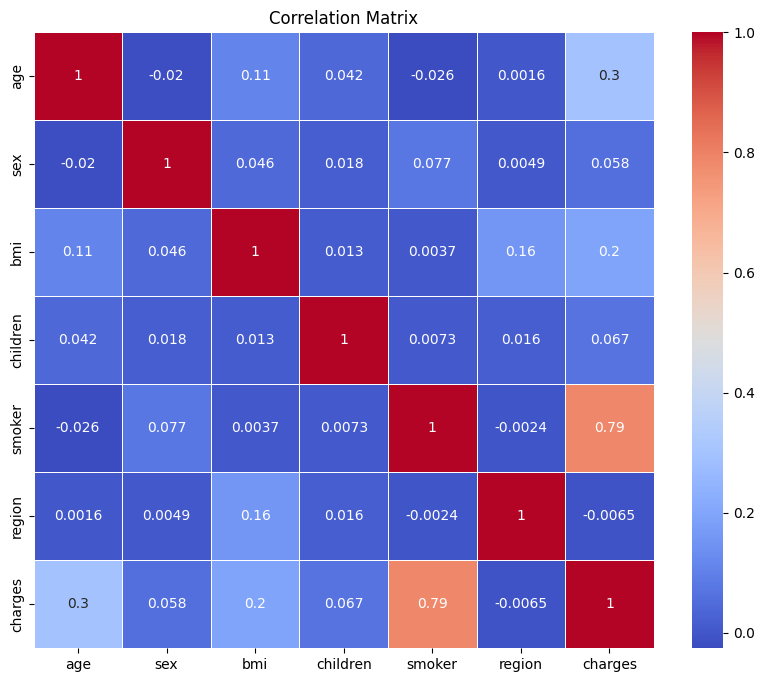

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

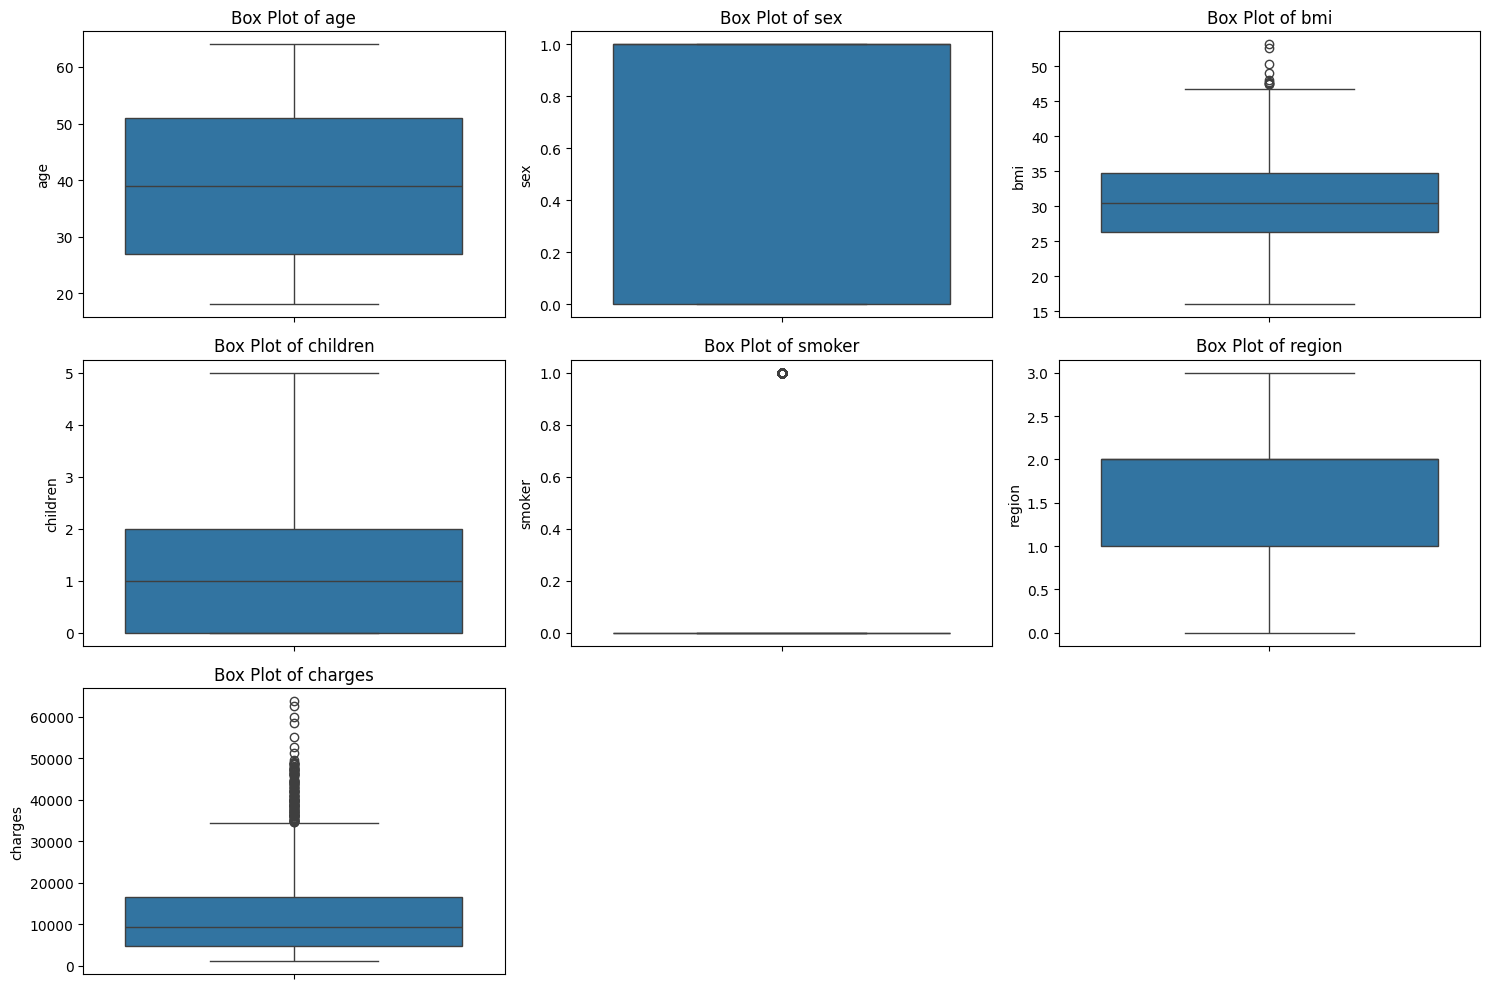

In [22]:
# Box plots for each column before removing outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

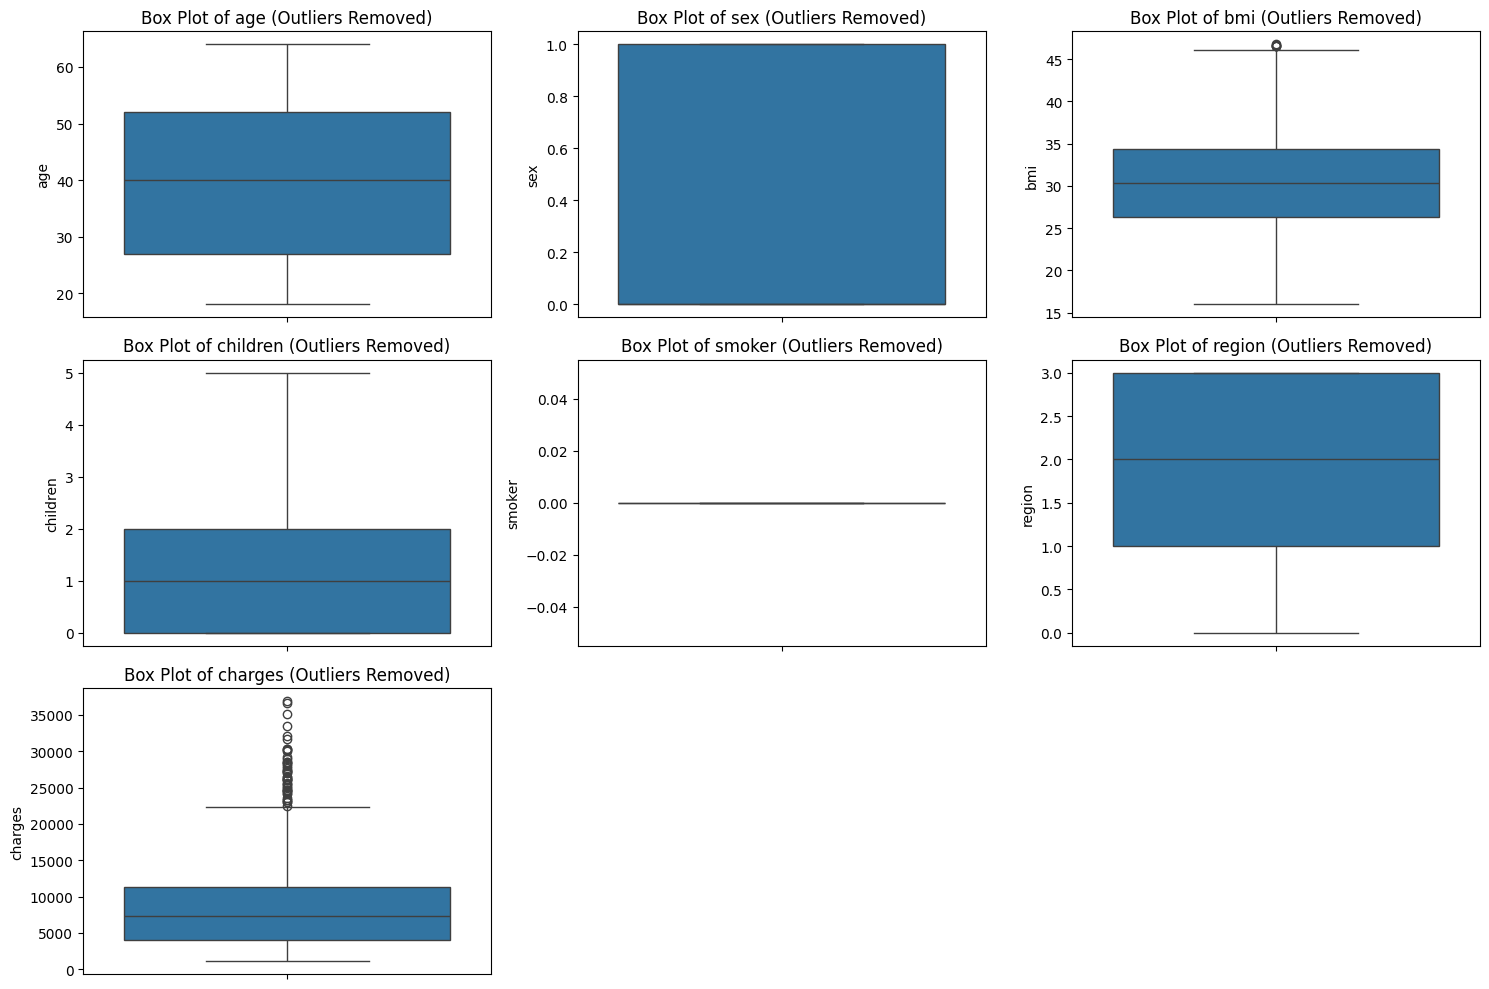

In [23]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Removing outliers for each column
df2 = df.copy()
for column in df.columns:
    if column != 'charges':  # Assuming 'charges' is our target and we won't remove outliers from the target variable
        df2 = remove_outliers(df2, column)

# Box plots for each column after removing outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(df2.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df2[column])
    plt.title(f'Box Plot of {column} (Outliers Removed)')

plt.tight_layout()
plt.show()


# **Multiple_Linear_Regression**

R^2 Score (Linear Regression): 0.3762784748193787
Mean Squared Error (MSE) (Linear Regression): 24552604.643620126
Root Mean Squared Error (RMSE) (Linear Regression): 4955.058490433804
Mean Absolute Percentage Error (MAPE) (Linear Regression): 0.3003936951976371


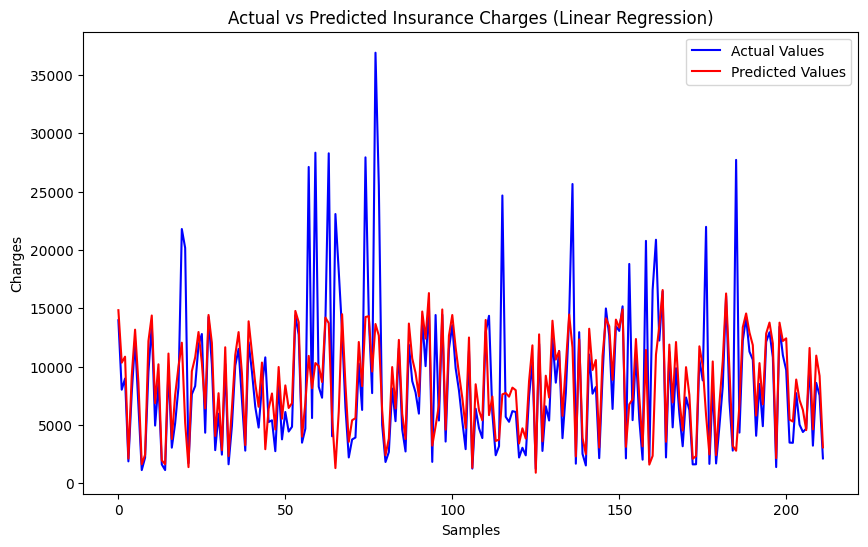

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# Splitting the data into features and target
X = df2.drop('charges', axis=1)
y = df2['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Making predictions
y_pred = model_lr.predict(X_test)

# Calculating performance metrics
accuracy_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)

# Printing the performance metrics
print(f"R^2 Score (Linear Regression): {accuracy_lr}")
print(f"Mean Squared Error (MSE) (Linear Regression): {mse_lr}")
print(f"Root Mean Squared Error (RMSE) (Linear Regression): {rmse_lr}")
print(f"Mean Absolute Percentage Error (MAPE) (Linear Regression): {mape_lr}")

# Plotting Actual vs Predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b')
plt.plot(y_pred, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Insurance Charges (Linear Regression)')
plt.xlabel('Samples')
plt.ylabel('Charges')
plt.legend()
plt.show()


# **Random Forest**

R^2 Score: 0.20990321004865142
Mean Squared Error (MSE): 31101915.40728239
Root Mean Squared Error (RMSE): 5576.909126683202
Mean Absolute Percentage Error (MAPE): 0.437794492525885


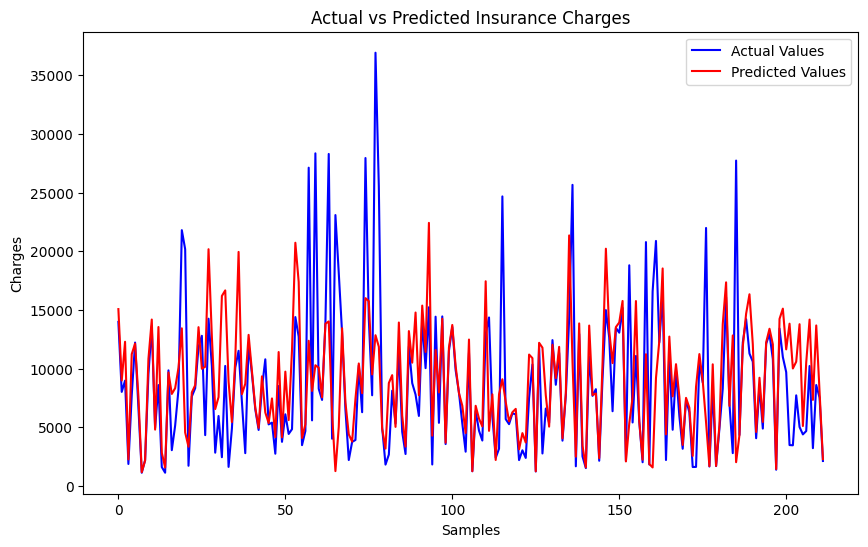

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Initializing and training the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Making predictions
y_pred = model_rf.predict(X_test)

# Calculating performance metrics
accuracy_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred)

# Printing the performance metrics
print(f"R^2 Score: {accuracy_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b')
plt.plot(y_pred, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Samples')
plt.ylabel('Charges')
plt.legend()
plt.show()

# **Gradient Boosting Machine (GBM)**

R^2 Score (GBM): 0.31373608112259155
Mean Squared Error (MSE) (GBM): 27014566.599251162
Root Mean Squared Error (RMSE) (GBM): 5197.5539053723305
Mean Absolute Percentage Error (MAPE) (GBM): 0.41766764663286315


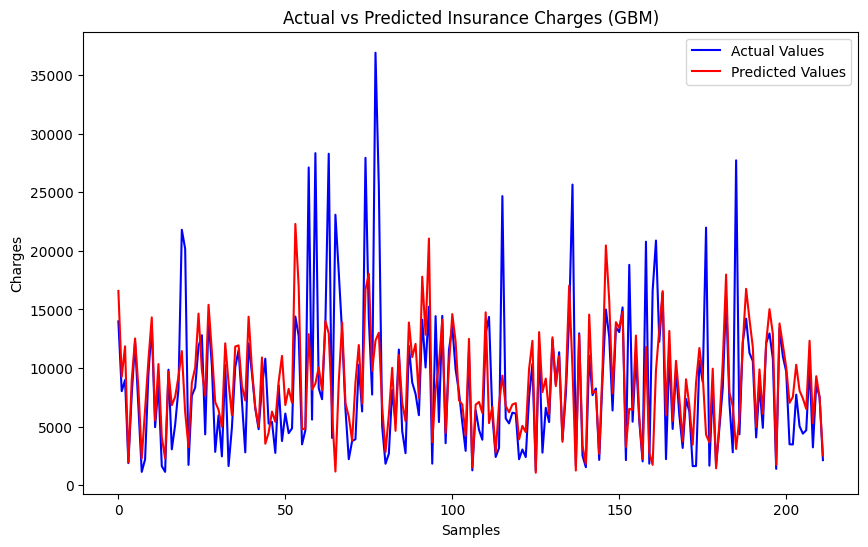

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GBM
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model_gbm.fit(X_train, y_train)

# Making predictions
y_pred = model_gbm.predict(X_test)

# Calculating performance metrics
accuracy_gbm = r2_score(y_test, y_pred)
mse_gbm = mean_squared_error(y_test, y_pred)
rmse_gbm = np.sqrt(mse_gbm)
mape_gbm = mean_absolute_percentage_error(y_test, y_pred)

# Printing the performance metrics
print(f"R^2 Score (GBM): {accuracy_gbm}")
print(f"Mean Squared Error (MSE) (GBM): {mse_gbm}")
print(f"Root Mean Squared Error (RMSE) (GBM): {rmse_gbm}")
print(f"Mean Absolute Percentage Error (MAPE) (GBM): {mape_gbm}")

# Plotting Actual vs Predicted values for GBM
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b')
plt.plot(y_pred, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Insurance Charges (GBM)')
plt.xlabel('Samples')
plt.ylabel('Charges')
plt.legend()
plt.show()


# **XGBOOST**

R^2 Score (XGBoost): 0.19354456457277525
Mean Squared Error (MSE) (XGBoost): 31745868.41941873
Root Mean Squared Error (RMSE) (XGBoost): 5634.347204372369
Mean Absolute Percentage Error (MAPE) (XGBoost): 0.4497280705723597


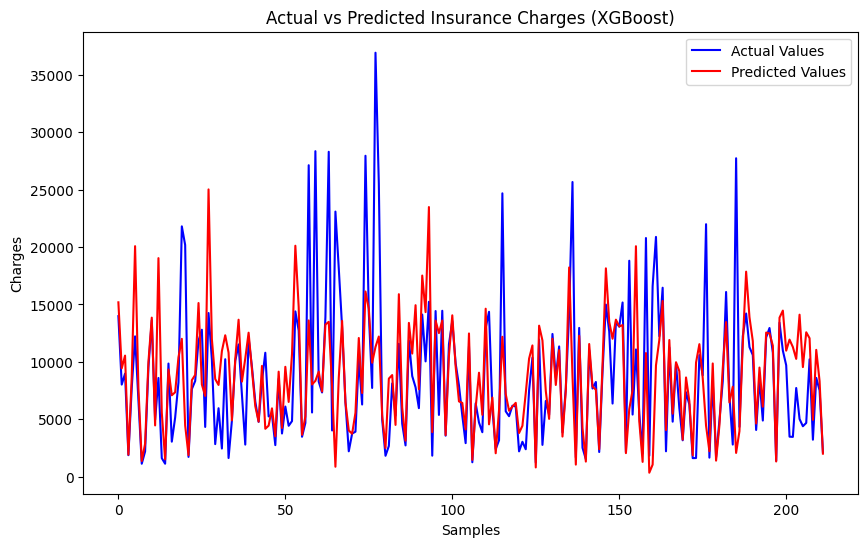

In [27]:
from xgboost import XGBRegressor

# Initialize XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Making predictions
y_pred = model_xgb.predict(X_test)

# Calculating performance metrics
accuracy_xgb = r2_score(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred)

# Printing the performance metrics
print(f"R^2 Score (XGBoost): {accuracy_xgb}")
print(f"Mean Squared Error (MSE) (XGBoost): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE) (XGBoost): {rmse_xgb}")
print(f"Mean Absolute Percentage Error (MAPE) (XGBoost): {mape_xgb}")

# Plotting Actual vs Predicted values for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b')
plt.plot(y_pred, label='Predicted Values', color='r')
plt.title('Actual vs Predicted Insurance Charges (XGBoost)')
plt.xlabel('Samples')
plt.ylabel('Charges')
plt.legend()
plt.show()


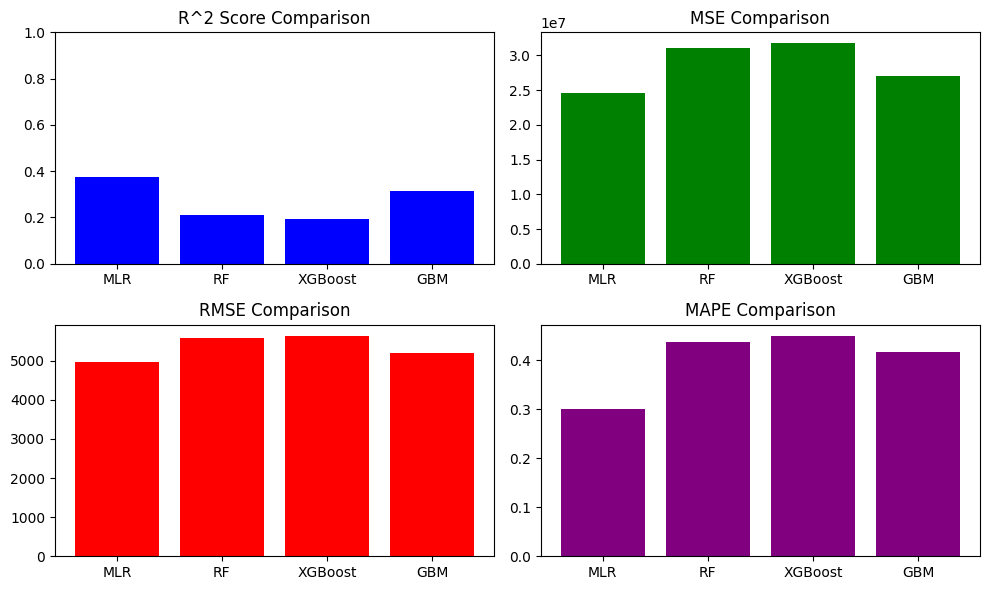

Metrics Comparison:
     Model  R^2 Score           MSE         RMSE      MAPE
0      MLR   0.376278  2.455260e+07  4955.058490  0.300394
1       RF   0.209903  3.110192e+07  5576.909127  0.437794
2  XGBoost   0.193545  3.174587e+07  5634.347204  0.449728
3      GBM   0.313736  2.701457e+07  5197.553905  0.417668


In [28]:
# Example values for metrics
metrics = {
    'Model': ['MLR', 'RF', 'XGBoost', 'GBM'],
    'R^2 Score': [accuracy_lr, accuracy_rf, accuracy_xgb, accuracy_gbm],
    'MSE': [mse_lr, mse_rf, mse_xgb, mse_gbm],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb, rmse_gbm],
    'MAPE': [mape_lr, mape_rf, mape_xgb, mape_gbm]
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Plotting comparison
plt.figure(figsize=(10, 6))

# Plot R^2 Score
plt.subplot(221)
plt.bar(df_metrics['Model'], df_metrics['R^2 Score'], color='b')
plt.title('R^2 Score Comparison')
plt.ylim(0, 1)

# Plot MSE
plt.subplot(222)
plt.bar(df_metrics['Model'], df_metrics['MSE'], color='g')
plt.title('MSE Comparison')

# Plot RMSE
plt.subplot(223)
plt.bar(df_metrics['Model'], df_metrics['RMSE'], color='r')
plt.title('RMSE Comparison')

# Plot MAPE
plt.subplot(224)
plt.bar(df_metrics['Model'], df_metrics['MAPE'], color='purple')
plt.title('MAPE Comparison')

plt.tight_layout()
plt.show()

# Display the metrics DataFrame
print("Metrics Comparison:")
print(df_metrics)


Accuracy on each cross-validation iteration:
Iteration 1: 0.3726599322823484
Iteration 2: 0.372416644214427
Iteration 3: 0.3783071334264724
Iteration 4: 0.6065471464628506
Iteration 5: 0.46927877192508505
Iteration 6: 0.29744495032480245
Iteration 7: 0.49197635368504467
Iteration 8: 0.30579011061627837
Iteration 9: 0.4732759087067022
Iteration 10: 0.3915968968529322

Average Validated R^2 Score: 0.4159293848496944


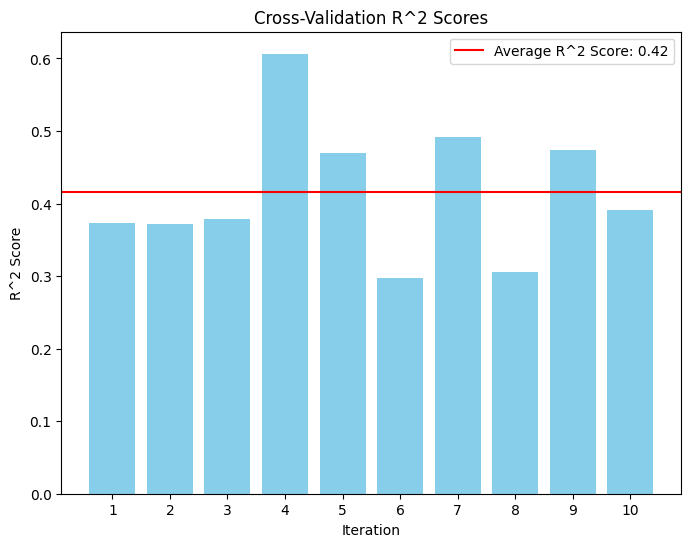

In [29]:
from sklearn.model_selection import cross_val_score, KFold

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_lr, X, y, cv=kf, scoring='r2')

# Print accuracy on each iteration
print("Accuracy on each cross-validation iteration:")
for i, score in enumerate(cv_scores):
    print(f"Iteration {i+1}: {score}")

# Calculate average validated accuracy
avg_accuracy = np.mean(cv_scores)
print(f"\nAverage Validated R^2 Score: {avg_accuracy}")

# Plotting count plot of accuracy at each iteration
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), cv_scores, color='skyblue')
plt.axhline(y=avg_accuracy, color='r', linestyle='-', label=f'Average R^2 Score: {avg_accuracy:.2f}')
plt.title('Cross-Validation R^2 Scores')
plt.xlabel('Iteration')
plt.ylabel('R^2 Score')
plt.xticks(range(1, 11))
plt.legend()
plt.show()


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Assume label_encoders dictionary is already defined from training phase
# label_encoders = {'sex': le_sex, 'smoker': le_smoker, 'region': le_region}

# Load the trained model (model_lr) and label encoders

def predict_insurance_charges(age, sex, bmi, children, smoker, region, model_lr, label_encoders):
    # Transform categorical variables using label encoders
    sex_encoded = label_encoders['sex'].transform([sex])[0]
    smoker_encoded = label_encoders['smoker'].transform([smoker])[0]
    region_encoded = label_encoders['region'].transform([region])[0]

    # Prepare input data as DataFrame
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex_encoded],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker_encoded],
        'region': [region_encoded]
    })

    # Make prediction using the trained Linear Regression model
    predicted_charge = model_lr.predict(input_data)[0]

    return predicted_charge

# Example of interactive user input and prediction
def main():
    print("Enter the following details to predict insurance charges:")
    age = int(input("Age: "))
    sex = input("Sex (male/female): ").strip().lower()
    bmi = float(input("BMI: "))
    children = int(input("Number of children: "))
    smoker = input("Smoker (yes/no): ").strip().lower()
    region = input("Region (northeast, northwest, southeast, southwest): ").strip().lower()

    # Ensure valid input for categorical variables
    if sex not in ['male', 'female']:
        print("Invalid input for sex. Please enter 'male' or 'female'.")
        return
    if smoker not in ['yes', 'no']:
        print("Invalid input for smoker. Please enter 'yes' or 'no'.")
        return
    if region not in ['northeast', 'northwest', 'southeast', 'southwest']:
        print("Invalid input for region. Please enter one of: northeast, northwest, southeast, southwest.")
        return

    # Call prediction function
    predicted_charge = predict_insurance_charges(age, sex, bmi, children, smoker, region, model_lr, label_encoders)

    # Display the prediction
    print(f"\nPredicted Insurance Charge: {predicted_charge:.2f} Rs")

if __name__ == "__main__":
    main()


Enter the following details to predict insurance charges:
Age: 22
Sex (male/female): male
BMI: 17.90
Number of children: 0
Smoker (yes/no): no
Region (northeast, northwest, southeast, southwest): southwest

Predicted Insurance Charge: 1614.08 Rs


In [33]:
import joblib

# Save the model
joblib.dump(model_lr, 'linear_regression_model.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']